GETTING STARTED
To get started, move into directory where PyNeb resides and enter python

In [1]:
%matplotlib inline
# import code and modules
import pyneb as pn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#######################################################################
# DEFINING ATOMS

# define an OII atom
O2 = pn.Atom("O", 2)

# alternate syntax to define an atom (spec is a string)
N2 = pn.Atom("N", "2")

In [4]:
# check atom definition
print(O2.elem)
print(O2.spec)
print(O2.atom)
print(O2.name)

O
2
O2
oxygen


In [6]:
# explore the atom: builtin data
print(O2.gs) # ground-state configuration

p3


In [7]:
# array of stat weights
print(O2.getStatWeight())

[4. 6. 4. 4. 2. 6. 4. 2.]


In [8]:
# stat weight of a given level
lev_i = 2
print(O2.getStatWeight(lev_i))

6.0


In [7]:
# explore the atom: adopted atomic data
pn.atomicData.getPredefinedDataFileDict() # we suggest using the tab for this command...
pn.atomicData.getDirForFile('o_ii_atom_WFD96.fits') # wanna know where the file lies?
O2.printSources() # print bibliographic references of data used to build O2

O2: Energy levels : NIST 2014
O2: A-values from level 6 : Wiese, Fuhr & Deters, 1996, JPCRD, Monograph 7, 369
O2: A-values from levels up to 5 : Zeippen 1982, MNRAS, 198, 111
O2: CS up to level 5 : Pradhan et al 2006, MNRAS 366, L6
O2: CS for levels from 6, interpolated to adapt to Pal07 Tem grid : Tayal 2007, ApJS, 171, 331


In [9]:
print(O2.NLevels) # number of levels in the selected data
print(O2.getEnergy(2)) # energy of first excited level (ground = 1) in Angstrom^-1
print(O2.getA(2,1)) # transition probability of 2->1

5
0.0002681055
3.82e-05


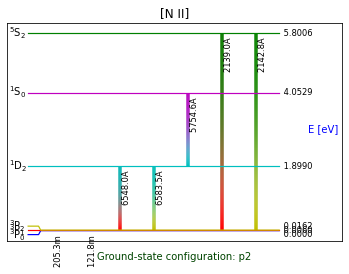

In [10]:
N2.plotGrotrian()

In [12]:
# set temperature and density
tem = 15000.
den = 1000.
print(O2.getPopulations(tem, den)) # compute populations

[9.74468368e-01 2.00608882e-02 5.46963327e-03 6.87357279e-07
 4.22917029e-07]


In [13]:
print(O2.getCritDensity(tem, level=2)) # critical density of level 2 at tem

1380.6604606545584


In [14]:
print(O2.getOmega(tem, 2, 1)) # effective collision strength of transition 2->1 at T=10000K

0.8388914238626578


In [15]:
print(O2.getOmegaArray(2, 1)) # array of effective collision strengths for 2->1 as a function of T

[0.796 0.797 0.798 0.801 0.808 0.817 0.823 0.83  0.832 0.832 0.831 0.833
 0.834 0.839 0.844 0.856 0.881 0.905 0.919]


In [16]:
print(O2.getTemArray()) # print array of temperatures of tabulated Omegas

[2.   2.18 2.3  2.48 2.7  2.88 3.   3.18 3.3  3.48 3.7  3.88 4.   4.18
 4.3  4.48 4.7  4.88 5.  ]


In [17]:
print(O2.getCollRates(tem)) # print collisional Rates at T=tem

[[0.00000000e+00 1.12907801e-09 7.48149900e-10 9.43885980e-11
  4.86376318e-11]
 [9.85090222e-09 0.00000000e+00 1.38701270e-08 2.82031409e-09
  1.12657440e-09]
 [9.80993005e-09 2.08451808e-08 0.00000000e+00 2.35004046e-09
  1.64105040e-09]
 [4.57814715e-09 1.56789014e-08 8.69297165e-09 0.00000000e+00
  5.17412780e-09]
 [4.71906029e-09 1.25282648e-08 1.21430487e-08 1.03502311e-08
  0.00000000e+00]]


In [18]:
pn.atomicData.getAllAvailableFiles('O3')

['* o_iii_atom_FFT04-SZ00.dat',
 '* o_iii_coll_SSB14.dat',
 '* o_iii_rec_P91.func',
 'o_iii_atom.chianti',
 'o_iii_atom_FFT04.dat',
 'o_iii_atom_GMZ97-WFD96.dat',
 'o_iii_atom_SZ00-WFD96.dat',
 'o_iii_atom_TFF01.dat',
 'o_iii_atom_TZ17.dat',
 'o_iii_coll.chianti',
 'o_iii_coll_AK99.dat',
 'o_iii_coll_LB94.dat',
 'o_iii_coll_MBZ20.dat',
 'o_iii_coll_Pal12-AK99.dat',
 'o_iii_coll_TZ17.dat']

warng _ManageAtomicData: trc data not available for O3


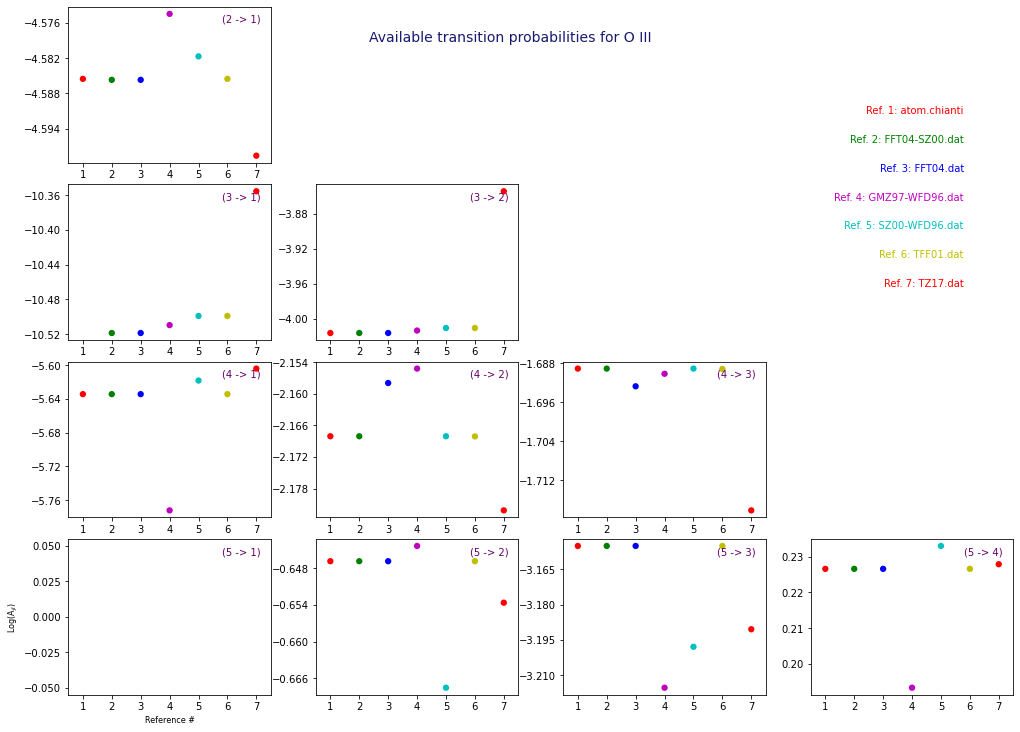

In [20]:
# This bit calls the script DataPlot.py to plot atomic data. 
dataplot = pn.DataPlot('O', 3, NLevels=5)
dataplot.plotAllA(figsize=(14, 10)) # transition probabilities plot 

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/plot/plotAtomicData.py:473: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


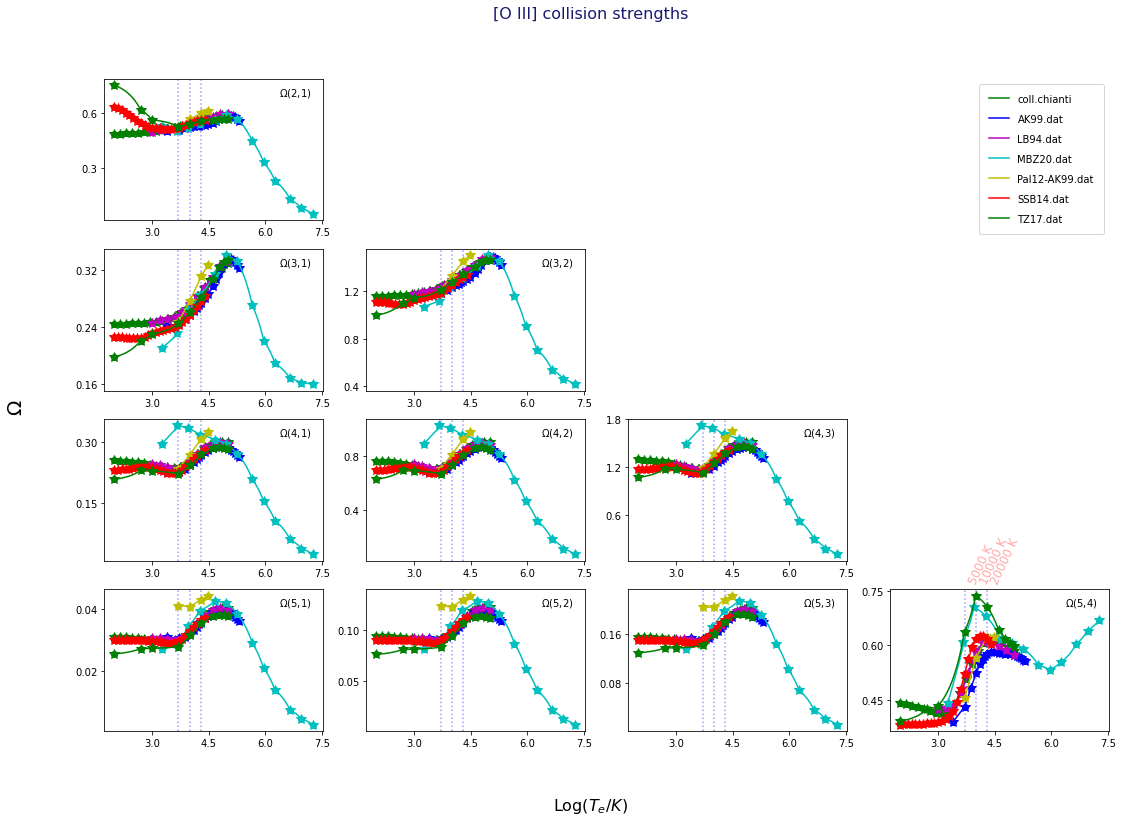

In [22]:
dataplot.plotOmega() # collision strength plot    

In [23]:
# customize atomic data 
# First step: check which directories are searched for atomic data files
pn.atomicData.getAllDataFilePaths()

['/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/atomic_data_fits/',
 '/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/atomic_data/',
 '/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/sample_scripts']

In [24]:
# Add your selected directory to the list
pn.atomicData.addDataFilePath('/tmp')

In [25]:
# Check if it's been added
pn.atomicData.getAllDataFilePaths()

['/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/atomic_data_fits/',
 '/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/atomic_data/',
 '/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/sample_scripts',
 '/tmp']

In [26]:
# Remove it if you gave the wrong dir
pn.atomicData.removeDataFilePath('/tmp')

In [27]:
# Set 'o_iii_.fits' to be the OIII atom file
pn.atomicData.setDataFile('o_iii_coll_Pal12-AK99.dat')

In [28]:
# define an atom with the new data
O2test = pn.Atom("O", 2)

In [29]:
# define all atoms at once and put them in a dictionary
# (all of them defined with the latest dataset selected)
atoms = pn.getAtomDict() #this generates a lot of warnings as not all element-spectrum combination exist

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

In [30]:
# see what atoms have been built
atoms

{'Al2': Atom Al2 from al_ii_atom_JSP86-HK87-VVF96-KS86.dat and al_ii_coll_KHAF92-TBK85-TBK84.dat,
 'Ar2': Atom Ar2 from ar_ii_atom_Bal06.dat and ar_ii_coll_PB95.dat,
 'Ar3': Atom Ar3 from ar_iii_atom_MB09.dat and ar_iii_coll_MB09.dat,
 'Ar4': Atom Ar4 from ar_iv_atom_RGJ19.dat and ar_iv_coll_RB97.dat,
 'Ar5': Atom Ar5 from ar_v_atom_LL93-MZ82-KS86.dat and ar_v_coll_GMZ95.dat,
 'Ba2': Atom Ba2 from ba_ii_atom_C04.dat and ba_ii_coll_SB98.dat,
 'Ba4': Atom Ba4 from ba_iv_atom_BHQZ95.dat and ba_iv_coll_SB98.dat,
 'C1': Atom C1 from c_i_atom_FFS85.dat and c_i_coll_JBK87-PA76.dat,
 'C1r': Atom C1 from c_i_rec_P91.func,
 'C2': Atom C2 from c_ii_atom_GMZ98.dat and c_ii_coll_BP92.dat,
 'C2r': Atom C2 from c_ii_rec_D00.func,
 'C3': Atom C3 from c_iii_atom_G83-NS78-WFD96.dat and c_iii_coll_Bal85.dat,
 'C4': Atom C4 from c_iv_atom_WFD96.dat and c_iv_coll_AK04.dat,
 'Ca5': Atom Ca5 from ca_v_atom_M83-KS86.dat and ca_v_coll_GMZ95.dat,
 'Cl2': Atom Cl2 from cl_ii_atom_MZ83.dat and cl_ii_coll_T04.dat,

In [31]:
# build only some atoms                       
atoms = pn.getAtomDict(atom_list=['O1', 'O2', 'O3', 'N2', 'N3'])

In [32]:
# explore some specific atom in the atoms collection
atoms['N2'].elem

'N'

In [33]:
# if you want to be able to access them directly rather than through a dictionary:
for key in atoms.keys():
    vars()[key]=atoms[key]

In [34]:
# for example
O2.elem

'O'

In [35]:
# list all atom features
dir(O2)

['ANN_init_kwargs',
 'ANN_inst_kwargs',
 'ANN_n_temden',
 'AtomData',
 'AtomHeader',
 'CollData',
 'EnergyNLevels',
 'IP',
 'IP_up',
 'NIST',
 'NLevels',
 'Z',
 '_A',
 '_Energy',
 '_StatWeight',
 '_Transition',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_getTemDen_1',
 '_getTemDen_ANN',
 '_getTemDen_MP',
 '_test_lev',
 'atom',
 'atomFile',
 'atomFileType',
 'atomFitsFile',
 'atomFitsPath',
 'atomNLevels',
 'atomPath',
 'calling',
 'collFile',
 'collFileType',
 'collFitsFile',
 'collFitsPath',
 'collNLevels',
 'collPath',
 'elem',
 'energy_Ryd',
 'energy_eV',
 'getA',
 'getCollRates',
 'getCritDensity',
 'getDensityRange',
 'getEmissivity',
 'getEnergy',
 'getHigh

In [36]:
#######################################################################
# MAKING CALCULATIONS

# set temperature and density
tem = 15000.
den = 1000.

# compute populations
O2.getPopulations(tem, den)

array([9.74468368e-01, 2.00608882e-02, 5.46963327e-03, 6.87357279e-07,
       4.22917029e-07])

In [37]:
# compute emissivity of transition (lev_i, lev_j)
O2.getEmissivity(tem, den, 3, 2)

array(2.61023869e-27)

In [38]:
# also works if tem is an array
tem = np.array([10000, 20000, 30000])
print(O2.getOmega(tem, 2, 1))
print(O2.getCollRates(tem))
print(O2.getPopulations(tem, den))

[0.834      0.84406867 0.85580808]
[[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [3.80021542e-10 1.87127422e-09 2.94646469e-09]
  [2.51710293e-10 1.24203112e-09 1.95669201e-09]
  [1.63490224e-11 2.19985852e-10 4.89760515e-10]
  [8.42755140e-12 1.12884048e-10 2.51995452e-10]]

 [[1.19944941e-08 8.58378169e-09 7.10610532e-09]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [1.72516467e-08 1.19734339e-08 9.89457622e-09]
  [1.71535930e-09 3.54215582e-09 4.29556164e-09]
  [6.83126125e-10 1.41281364e-09 1.70610924e-09]]

 [[1.19513484e-08 8.55835787e-09 7.08534686e-09]
  [2.59521158e-08 1.79860360e-08 1.48561215e-08]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [1.43123107e-09 2.95216539e-09 3.56459531e-09]
  [1.00339378e-09 2.05940718e-09 2.49676583e-09]]

 [[5.52264475e-09 4.04317380e-09 3.41089912e-09]
  [1.83584792e-08 1.41923428e-08 1.24043685e-08]
  [1.01823763e-08 7.87427137e-09 6.85577717e-09]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [6.14649675e-09 4.65381407

In [39]:
# tem and den can be arrays as well as single numbers
tem = np.array([10000, 12000, 13000]) 
den = np.array([100, 200, 300])
print(O2.getPopulations(tem, den)) # returns the n_tem x n_den x n_levels array of populations
print(O2.getPopulations(tem, den, product=False)) #  element-by-element multiplication of tem and den (no scalar product: returns [pop(tem_1, den_1), pop(tem_2, den_2), ... pop(tem_n, den_n)] 

[[[9.98878029e-01 9.97858872e-01 9.96922776e-01]
  [9.98019410e-01 9.96212446e-01 9.94547508e-01]
  [9.97544938e-01 9.95301601e-01 9.93232313e-01]]

 [[9.57753866e-04 1.80282355e-03 2.55833017e-03]
  [1.69187931e-03 3.19417248e-03 4.54370632e-03]
  [2.09774000e-03 3.96480758e-03 5.64500125e-03]]

 [[1.64204847e-04 3.38277103e-04 5.18849618e-04]
  [2.88680113e-04 5.93315430e-04 9.08678934e-04]
  [3.57279095e-04 7.33499218e-04 1.12253769e-03]]

 [[7.75482765e-09 1.69421721e-08 2.73793081e-08]
  [1.86812148e-08 4.06183659e-08 6.54110546e-08]
  [2.60683216e-08 5.65585724e-08 9.09340968e-08]]

 [[4.94747738e-09 1.06910451e-08 1.71439551e-08]
  [1.19270981e-08 2.56596463e-08 4.10074468e-08]
  [1.66484824e-08 3.57461699e-08 5.70380805e-08]]]
[[9.98878029e-01 9.96212446e-01 9.93232313e-01]
 [9.57753866e-04 3.19417248e-03 5.64500125e-03]
 [1.64204847e-04 5.93315430e-04 1.12253769e-03]
 [7.75482765e-09 4.06183659e-08 9.09340968e-08]
 [4.94747738e-09 2.56596463e-08 5.70380805e-08]]


In [40]:
# find transition corresponding to given wavelength
N2.printTransition(6584)

Input wave: 6584.0
Closest wave found: 6583.5
Relative error: 8E-05 
Transition: 4 -> 3


In [41]:
# temperature determination from an intensity ratio
N2.getTemDen(0.01, den=1000., wave1=5755, wave2=6584)

8573.093534627478

In [42]:
# same as above, by specifying the levels involved
N2.getTemDen(0.01, den=1000., lev_i1=5, lev_j1=4, lev_i2=4, lev_j2=3)

8573.093534627478

In [43]:
# same as above, by specifying the levels involved
N2.getTemDen(0.01, den=1000., to_eval = 'L(5755) / L(6584)')

8573.093534627478

In [48]:
# ionic abundance (intensity, temperature, density, transition)
O2.getIonAbundance(100, 1.5e4, 100., wave=3727)

1.957562060137208e-05

In [49]:
# printout as in old nebular
O2.printIonic() # only prints transitions and corresponding wavelengths. Useful for a quick glance at the atom.

elem = O
spec = 2

warng Atom O2: Cannot print populations as tem or den is missing
warng Atom O2: Cannot print critical densities as tem is missing
   3728.81A 
    (2-->1) 


   3726.03A     499.36m 
    (3-->1)     (3-->2) 


   2470.34A    7319.98A    7330.73A 
    (4-->1)     (4-->2)     (4-->3) 


   2470.22A    7318.92A    7329.66A    5023.75m 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 




In [50]:
O2.printIonic(tem=10000, den=100) # also prints line emissivities

elem = O
spec = 2
temperature = 10000.0 K
density =  100.0 cm-3

Level   Populations  Critical densities
Level 1:  9.989E-01  0.000E+00
Level 2:  9.578E-04  1.207E+03
Level 3:  1.642E-04  4.093E+03
Level 4:  7.755E-09  5.839E+06
Level 5:  4.947E-09  3.981E+06

   3728.81A 
    (2-->1) 
  1.948E-21 

   3726.03A     499.36m 
    (3-->1)     (3-->2) 
  1.444E-21   7.836E-28 

   2470.34A    7319.98A    7330.73A 
    (4-->1)     (4-->2)     (4-->3) 
  3.516E-23   2.462E-23   1.290E-23 

   2470.22A    7318.92A    7329.66A    5023.75m 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 
  9.227E-24   8.256E-24   1.367E-23   4.068E-37 

# H-beta volume emissivity:
1.235E-25 N(H+) * N(e-)  (erg/s)


In [51]:
O2.printIonic(tem=10000, den=100, printA=True, printPop=True, printCrit=True) # also prints populations and critical densities

elem = O
spec = 2
temperature = 10000.0 K
density =  100.0 cm-3

Level   Populations  Critical densities
Level 1:  9.989E-01  0.000E+00
Level 2:  9.578E-04  1.207E+03
Level 3:  1.642E-04  4.093E+03
Level 4:  7.755E-09  5.839E+06
Level 5:  4.947E-09  3.981E+06

3.820E-05   
   3728.81A 
    (2-->1) 
  1.948E-21 

1.650E-04   1.200E-07   
   3726.03A     499.36m 
    (3-->1)     (3-->2) 
  1.444E-21   7.836E-28 

5.640E-02   1.170E-01   6.140E-02   
   2470.34A    7319.98A    7330.73A 
    (4-->1)     (4-->2)     (4-->3) 
  3.516E-23   2.462E-23   1.290E-23 

2.320E-02   6.150E-02   1.020E-01   2.080E-11   
   2470.22A    7318.92A    7329.66A    5023.75m 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 
  9.227E-24   8.256E-24   1.367E-23   4.068E-37 

# H-beta volume emissivity:
1.235E-25 N(H+) * N(e-)  (erg/s)


In [52]:
# Compute Hb emissivity at T=10000K
H1 = pn.RecAtom('H', 1)
H1.getEmissivity(10000, 1e2, 4, 2)

array(1.235e-25)

In [53]:
# simultaneously compute temperature and density from pairs of line ratios
# First of all, a Diagnostics object must be created and initialized with the relevant diagnostics.
diags = pn.Diagnostics()   # this creates the object
diags.getAllDiags()  # see what Diagnostics exist
tem, den = diags.getCrossTemDen('[NII] 5755/6548', '[SII] 6731/6716', 0.050, 1.0)

In [54]:
#TO BE CONTINUED FROM HERE
print(tem, den)

10490.225428751679 724.3990279425481
